In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [11]:
df.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


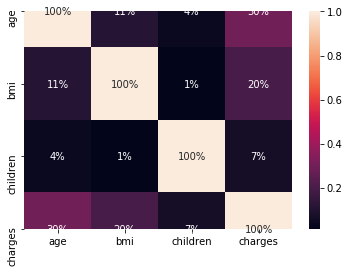

In [16]:

sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.show()

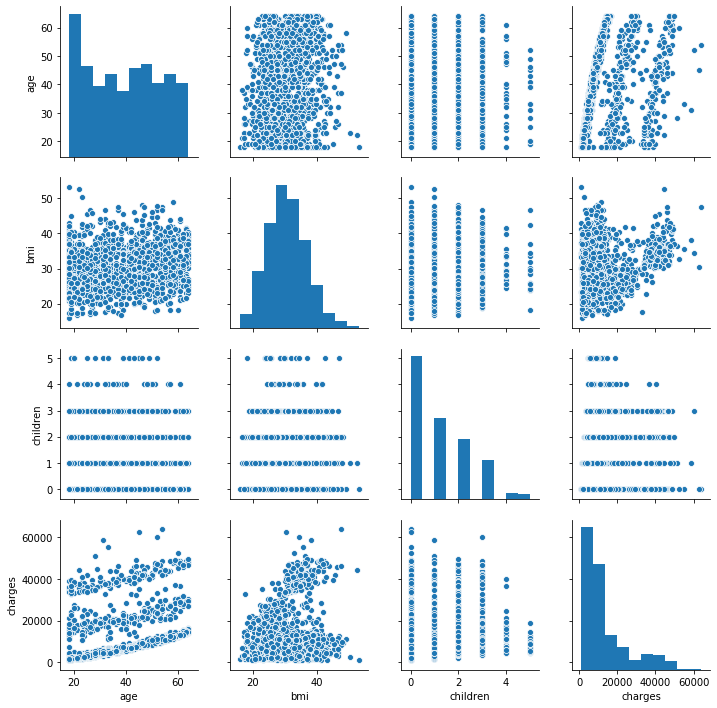

In [17]:
sns.pairplot(df)

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

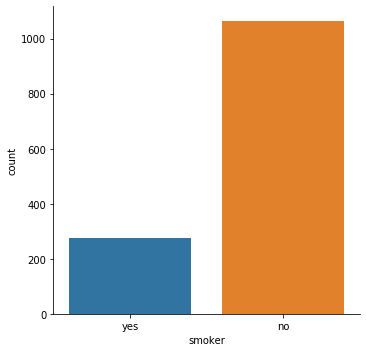

In [21]:
sns.catplot(x='smoker',data=df,kind='count')

In [22]:
pd.crosstab(df['smoker'],df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


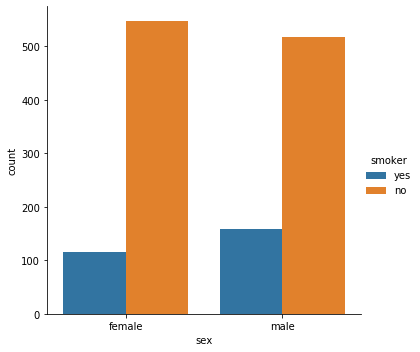

In [23]:
sns.catplot(x='sex',hue='smoker',data=df,kind='count')

Text(0.5, 1.0, 'Medical costs by smokers')

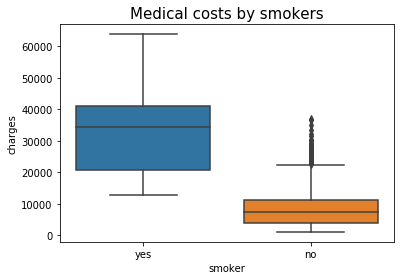

In [24]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Medical costs by smokers',fontsize=15)

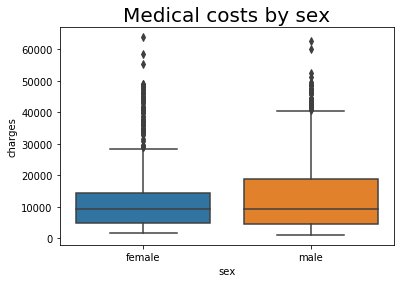

In [25]:
sns.boxplot(x='sex',y='charges',data=df)
plt.title('Medical costs by sex',fontsize=20)
plt.show()

In [27]:
df.loc[df['sex']=='male','sex']=1
df.loc[df['sex']=='female','sex']=0

In [28]:
df.loc[df['smoker']=='yes','smoker']=1
df.loc[df['smoker']=='no','smoker']=0

In [42]:
status=pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,status],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [46]:
from sklearn.model_selection import train_test_split
X=df[['age','sex','bmi','children','smoker','northwest','southeast','southwest']]
y=df[['charges']]

In [47]:
X.shape

(1338, 8)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.coef_

array([[  259.96359057,  -370.117214  ,   331.68416785,   599.08932264,
        23890.56770057,    34.77987691,  -837.15334353,  -850.10003574]])

In [52]:
lm.intercept_

array([-11934.92082434])

In [53]:
y_test_pred=lm.predict(X_test)

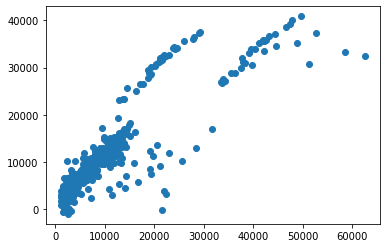

In [54]:
plt.scatter(y_test,y_test_pred)

In [55]:
y_train_pred=lm.predict(X_train)

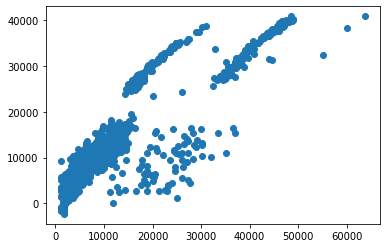

In [56]:
plt.scatter(y_train,y_train_pred)

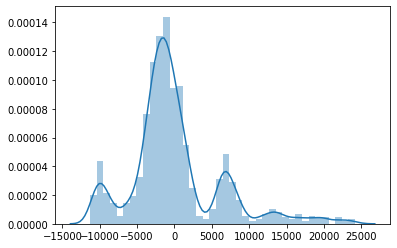

In [58]:
res=y_train-y_train_pred
sns.distplot(res)

In [59]:
score=lm.score(X_test,y_test)
score*100

76.14287237353057

In [60]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.7463560813025463

In [61]:
r2_score(y_test,y_test_pred)

0.7614287237353056

In [62]:
d=np.array([[33,1,22.705,0,1,0,0,1]])

In [63]:
lm.predict(d)

array([[26845.11714636]])